In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
from scipy.io import wavfile 

## Recording

In [2]:
## Set parameters 

fs = 44100 # Usually 44100 or 48000 fps 
duration = 5  # seconds
t = 0.01 # How many seconds each frequency plays for 
filename = 'recorded_signal.wav'

In [16]:
# I'm using channels=1, most audio recording uses 2 channels because 
# of two headphone speakers (I think) but I think 1 channel is better 
# for plotting data
my_recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait()
sd.stop()

print("Shape of recording data: ", np.shape(my_recording))

print('Done recording')

wavfile.write(filename, fs, my_recording)

# Make sure `python -m sounddevice` or `sd.query_devices()` says
# you're connected to both *in* and *out* channels. 

Shape of recording data:  (220500, 1)
Done recording


## Post-Processing

In [34]:
fs, data = wavfile.read('first_gen.wav')

In [35]:
# Read the file - we'll have to change this to do while recording 
# SOURCE: https://pythondsp.rob-elder.com/loading-wav-files-and-showing-frequency-response/
# sample_rate, data = wavfile.read(filename) 
print("Sample rate (should be same as fs): ", fs)
print("Data shape (should be 1-dimensional): ", data.shape)
samples = data.shape[0]

Sample rate (should be same as fs):  44100
Data shape (should be 1-dimensional):  (100107,)


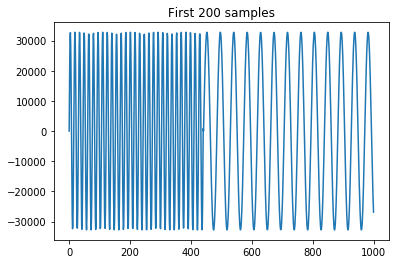

In [36]:
plt.title("First 200 samples")
plt.plot(data[:1000])
plt.show()

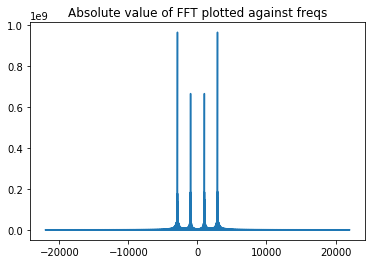

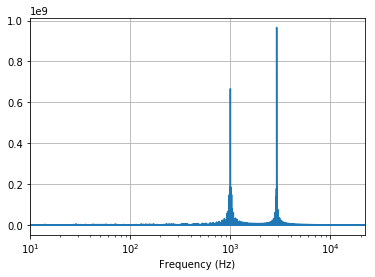

In [40]:
### This figures out frequencies for the *WHOLE* recording. 
data_fft = np.fft.fft(data)
fft_abs = abs(data_fft) 
freqs = np.fft.fftfreq(samples, 1/sample_rate) 
plt.title("Absolute value of FFT plotted against freqs")
plt.plot(freqs, fft_abs)
plt.show() 

# Let's use a better scale: the log scale which shows freqs in Hertz 
plt.xlim([10, sample_rate/2]) 
plt.xscale('log')
plt.grid(True)
plt.xlabel('Frequency (Hz)')
# The original example used freqs[:int(freqs.size/2)] but I don't 
# think it matters
plt.plot(freqs, fft_abs)
plt.show()

In [66]:
mid_idx = int(len(fft_abs)/2)
half_sig = fft_abs[mid_idx:]
f1 = freqs[np.argmax(half_sig)]
half_sig[np.argmax(half_sig)-2000:np.argmax(half_sig)+2000] = 0
half_sig[np.argmax(half_sig)-2000:np.argmax(half_sig)+2000]
# f2 = freqs[np.argmax(half_sig)]
# print(f1, f2)


array([28006.74836955, 88167.449373  , 69081.18133269, ...,
           0.        ,     0.        ,     0.        ])

In [15]:
### This figures out frequencies for every interval of t seconds. 
### This is what we use to decode but it has to be perfectly 
### aligned with when the first signal starts. 

samp_p_chunk = int(t * fs)
start = int(0 * fs) # Index of frame when signal starts
end = int(duration * fs) # Index of frame when signal stops
chunks = [data[i:i + samp_p_chunk] 
          for i in range(start, end, samp_p_chunk)]
print('Number of chunks (should be duration / t): ', len(chunks)) 

result_freqs = []
for chunk in chunks: 
    c_fft = np.fft.fft(chunk)
    c_fft_abs = abs(c_fft)
    
    c_samples = chunk.shape[0]
    c_freqs = np.fft.fftfreq(c_samples, 1/sample_rate)
    
    ### PROBLEM that isn't trivial: not sure what to do but we need to find a way to get the maximum frequency 
    ### from fft graph 

Number of chunks (should be duration / t):  500


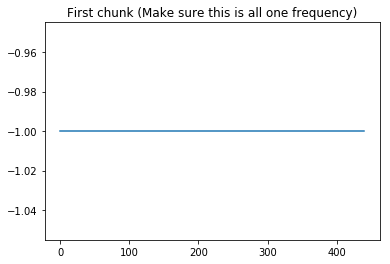

In [30]:
# Sanity check: plots first chunk so we know it captures a whole signal
plt.title("First chunk (Make sure this is all one frequency)")
plt.plot(chunks[0])
plt.show()

In [69]:
a = [1,2,3,4,5]
a[2:4] = 0 

TypeError: can only assign an iterable